# Monte-Carlo par chaînes de Markov (MCMC)

In [1]:
import numpy as np
import random as rand
import matplotlib.pyplot as plt
import pickle as pkl
import numpy.random as npr

## Estimation de π par Monte Carlo

In [2]:
def tirage(m):
	return np.array([rand.random()*m*2-m,rand.random()*m*2-m])
	
print ("tirage(4) = ",tirage(4))

tirage(4) =  [-2.05430707 -1.34552992]


In [3]:
def monteCarlo(N):
    
	n=0
	p=np.random.rand(2,N)*1*2-1
	x=p[0]
	y=p[1]
	dist=x*x+y*y
	
	n=len(np.where(dist<=1)[0])
	return 4.*n/N,x,y,dist
     
 
print ("monteCarlo(5) = ",monteCarlo(5))

monteCarlo(5) =  (3.2, array([ 0.65298208, -0.09983262,  0.87223313,  0.20575121,  0.34397941]), array([-0.66795361,  0.96939878,  0.667916  ,  0.46330306, -0.02654187]), array([ 0.87254762,  0.94970055,  1.20690242,  0.25698328,  0.1190263 ]))


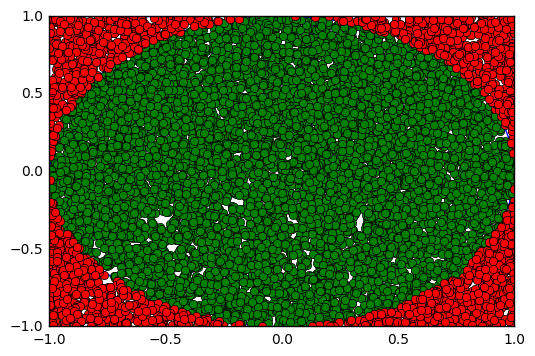

In [4]:
def tracer(N):
	plt.figure()
	# trace le carre
	plt.plot([-1, -1, 1, 1], [-1, 1, 1, -1], '-')

	# trace le cercle
	x = np.linspace(-1, 1, 100)
	y = np.sqrt(1- x*x)
	plt.plot(x, y, 'b')
	plt.plot(x, -y, 'b')

	# estimation par Monte Carlo
	pi, x, y,dist = monteCarlo(N)
	# trace les points dans le cercle et hors du cercle
	#dist = x*x + y*y
	plt.plot(x[dist <=1], y[dist <=1], "go")
	plt.plot(x[dist>1], y[dist>1], "ro")
	plt.show()

tracer(int(1e4))

## Décodage par la méthode de Metropolis-Hastings

In [7]:
with open('countWar.pkl', 'rb') as f:
    (count, mu, A) = pkl.load(f, encoding='latin1')
#(count, mu, A) = pkl.load(file("countWar.pkl", "rb"))
secret = (open("secret.txt", "r")).read()[0:-1]
secret2 = (open("secret2.txt", "r")).read()[0:-1]

print ("count = ",count)
print ("mu = ",mu)
print ("A= ",A)
print ("secret = ", secret)
print ("secret2 = ", secret2)

count =  {'Y': 1237, 'j': 2182, 'A': 5759, 'J': 303, '!': 3923, 'X': 24, 'M': 3228, '2': 123, 's': 159214, 'R': 2252, 'f': 52627, 'n': 179584, 'i': 165335, 'y': 44698, 'p': 38677, 'r': 144272, "'": 7523, 'h': 162535, 'U': 206, 't': 218172, 'E': 1377, 'w': 56065, 'v': 25864, '7': 33, '8': 164, 'W': 2864, 'O': 1538, 'K': 1179, 'z': 2277, '=': 2, 'g': 49719, '/': 2, '(': 650, 'u': 64712, 'F': 1880, '4': 14, 'b': 30817, 'L': 651, 'l': 95383, '"': 17949, 'q': 2285, 'G': 1190, '.': 30590, 'Q': 34, ',': 39742, '6': 43, 'P': 5674, 'k': 19102, 'e': 311292, ';': 1145, 'I': 6784, '*': 10, ' ': 511066, '9': 25, 'o': 189948, 'D': 1969, 'm': 58055, 'H': 3620, '3': 46, ')': 650, '?': 3136, 'a': 198298, 'x': 3685, 'C': 1335, 'Z': 108, '0': 138, 'B': 3553, 'd': 115782, 'c': 58959, 'N': 3544, ':': 975, '-': 6225, '1': 300, 'S': 2915, 'T': 5971, 'V': 746, '5': 38}
mu =  [  1.97632364e-05   1.97632364e-05   1.14666298e-01   3.95264729e-04
   1.97632364e-05   1.42295302e-03   1.58105891e-04   4.54554438e-0

In [9]:
def swapF(f):
	f1=f.copy()
	cles=f1.keys()
	n=len(cles)
	l1=int(rand.random()*n)
	l2=int(rand.random()*n)
	while l2==l1:
		l2=int(rand.random()*n)
	c1=list(cles)[l1]
	c2=list(cles)[l2]
	a=f1[c1]
	f1[c1]=f1[c2]
	f1[c2]=a
	return f1
 
tau = {'a' : 'b', 'b' : 'c', 'c' : 'a', 'd' : 'd' } 
print (swapF(tau))

{'c': 'a', 'b': 'b', 'a': 'c', 'd': 'd'}


In [10]:
def decrypt(m,f):
	s=''
	for i in m:
		s+=f[i]
	return s
 
tau = {'a' : 'b', 'b' : 'c', 'c' : 'a', 'd' : 'd' }
print (decrypt ( "aabcd", tau ))
print (decrypt ( "dcba", tau ))

bbcad
dacb


In [13]:
def logLikelihood(m,mu,A,chars):
	ind1=list(chars).index(m[0])	
	p=np.log(mu[ind1])
	for i in range(len(m)-1):
		ind2=list(chars).index(m[i+1])
		p+=np.log(A[ind1][ind2])
		ind1=ind2
	return p

print (logLikelihood( "abcd", mu, A, count.keys () ))
print (logLikelihood( "dcba", mu, A, count.keys () ))

-25.8852471321
-27.2359063153


In [15]:
def MetropolisHastings(m,mu,A,f,N):
	f0=f.copy()
	chars=f0.keys()
	p0=logLikelihood(m,mu,A,chars)
	sol=decrypt(m,f0)
	nb=0
	for i in range(N):
		f1=swapF(f0)
		chars=f1.keys()
		p1=logLikelihood(m,mu,A,chars)
		#print p1,p0
		if p1-p0>=tirage(1)[1]:
			nb+=1
			f0=f1
			p0=p1
			sol=decrypt(m,f0)
			#print sol
	return sol,f0

In [16]:
def identityTau ():
    tau = {}
    for k in count.keys ():
        tau[k] = k
    return tau

In [17]:
def updateOccurrences(text, count):
    for c in text:
        if c == u'\n':
            continue
        try:
            count[c] += 1
        except KeyError as e:
            count[c] = 1

In [18]:
def mostFrequent(count):
    bestK = []
    bestN = -1
    for k in count.keys():
        if (count[k]>bestN):
            bestK = [k]
            bestN = count[k]
        elif (count[k]==bestN):
            bestK.append(k)
    return bestK


In [19]:
def replaceF(f, kM, k):
    try:
        for c in f.keys():
            if f[c] == k:
                f[c] = f[kM]
                f[kM] = k
                return
    except KeyError as e:
        f[kM] = k

In [20]:
def mostFrequentF(message, count1, f={}):
    count = dict(count1)
    countM = {}
    updateOccurrences(message, countM)
    while len(countM) > 0:
        bestKM = mostFrequent(countM)
        bestK = mostFrequent(count)
        if len(bestKM)==1:
            kM = bestKM[0]
        else:
            kM = bestKM[npr.random_integers(0, len(bestKM)-1)]
        if len(bestK)==1:
            k = bestK[0]
        else:
            k = bestK[npr.random_integers(0, len(bestK)-1)]
        replaceF(f, kM, k) 
        countM.pop(kM)
        count.pop(k)
    return f

In [23]:
tau_init = mostFrequentF(secret2, count, identityTau () )
MetropolisHastings(secret2, mu, A, tau_init, 1000 )

/home/like/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:11: DeprecationWarning: This function is deprecated. Please call randint(0, 1 + 1) instead
/home/like/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:11: DeprecationWarning: This function is deprecated. Please call randint(0, 7 + 1) instead
/home/like/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:11: DeprecationWarning: This function is deprecated. Please call randint(0, 6 + 1) instead
/home/like/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:11: DeprecationWarning: This function is deprecated. Please call randint(0, 5 + 1) instead
/home/like/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:11: DeprecationWarning: This function is deprecated. Please call randint(0, 4 + 1) instead
/home/like/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:11: DeprecationWarning: This function is deprecated. Please call randint(0, 3 + 1) instead
/home/like/anaconda3/lib/pyt

('"rr sgcna iuheauei sn,e tbn,erem nroap tsnt wntsQ "bbh,hap nt halhahteihcnriy cntsecnthuiy tse coit eInut ol iuheaueiy n.namoai tse wboueii ol nanrfihi nam eatebi oa tse aed wboueii ol tse hatepbnthoa ol gakaoday halhahterf icnrry \'gnaththeiQ ".namoahap tse uoauewthoa ol ungiey cntsecnthui ieeki rndy tsnt hiy tse wbowebtf uoccoa to nrr gakaoday halhahterf icnrry ereceatiQ Ba naotseb lobc .gt nroap tse ince wnts ol belreuthoa tse otseb iuheauei sn,e wboueememQ !sea Hedtoa eagauhntem tse rnd ol pbn,htf se mhm aot inf tsnt tse iga ob tse enbts snm n wbowebtf ol nttbnuthoaP se inhm tsnt nrr .omhei lboc tse rnbpeit to tse icnrreit sn,e tse wbowebtf ol nttbnuthap oae naotseby tsnt hiy ren,hap nihme tse \'geithoa ol tse ungie ol tse co,eceat ol tse .omheiy se eIwbeiiem tse wbowebtf uoccoa to nrr .omhei lboc tse halhahterf rnbpe to tse halhahterf icnrrQ -se ince hi moae .f tse antgbnr iuheaueiT ren,hap nihme tse \'geithoa ol ungiey tsef ieek lob rndiQ Ahitobf itnami oa tse ince wntsQ "am hl